In [5]:
from utils.save_data import clean_all_csv_files
clean_all_csv_files()

In [1]:
from models.trainModel import load_model
different_traning_sizes = [10,25,50,75,100,150,200,250,300,350,400,500,1000,2000,10000,50000]
ai_models = list(map(lambda x: load_model(f"CNN_paper_work_AB_CD_{x}"),different_traning_sizes))

Trails_class_nA100000
making the model...
Metal device set to: Apple M2

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        320       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 le

2023-01-18 12:03:03.336703: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-18 12:03:03.336812: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2023-01-18 12:03:03.516080: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-01-18 12:03:03.712142: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


197/197 [==============================] - ETA: 0s - loss: 1.4459 - accuracy: 0.6610

2023-01-18 12:03:08.649702: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


197/197 [==============================] - 6s 27ms/step - loss: 1.4459 - accuracy: 0.6610 - val_loss: 0.5584 - val_accuracy: 0.7395
Epoch 2/20
197/197 [==============================] - 5s 23ms/step - loss: 0.5087 - accuracy: 0.7453 - val_loss: 0.4610 - val_accuracy: 0.7497
Epoch 3/20
197/197 [==============================] - 5s 24ms/step - loss: 0.2604 - accuracy: 0.8926 - val_loss: 0.1785 - val_accuracy: 0.9140
Epoch 4/20
197/197 [==============================] - 5s 24ms/step - loss: 0.0937 - accuracy: 0.9617 - val_loss: 1.1128 - val_accuracy: 0.6918
Epoch 5/20
197/197 [==============================] - 5s 23ms/step - loss: 0.0688 - accuracy: 0.9742 - val_loss: 0.3009 - val_accuracy: 0.8769
Epoch 6/20
197/197 [==============================] - 5s 24ms/step - loss: 0.0186 - accuracy: 0.9938 - val_loss: 0.0029 - val_accuracy: 0.9994
Epoch 7/20
197/197 [==============================] - 5s 24ms/step - loss: 0.0154 - accuracy: 0.9935 - val_loss: 0.0028 - val_accuracy: 0.9976
Epoch 8/20

INFO:tensorflow:Assets written to: models/savedModels/Trails_class_nA100000/assets


INFO:tensorflow:Assets written to: models/savedModels/Trails_class_nA100000/assets


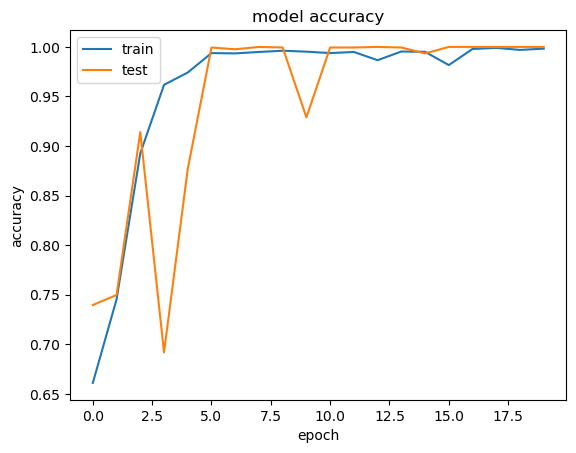

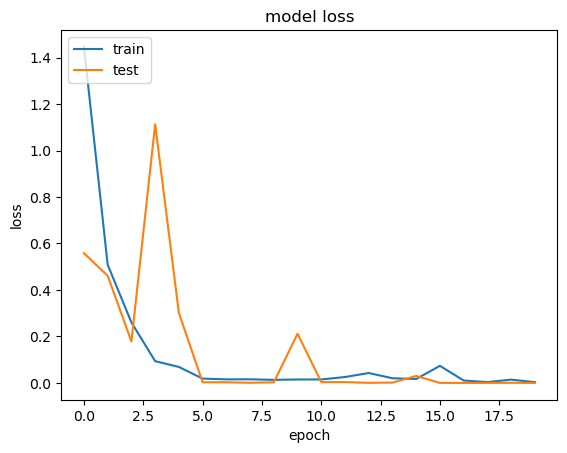

32/79 [===========>..................] - ETA: 0s

2023-01-18 12:04:38.592792: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


79/79 [==============================] - 1s 8ms/step
Confusion matrix:
[[1262    0]
 [   0 1248]]


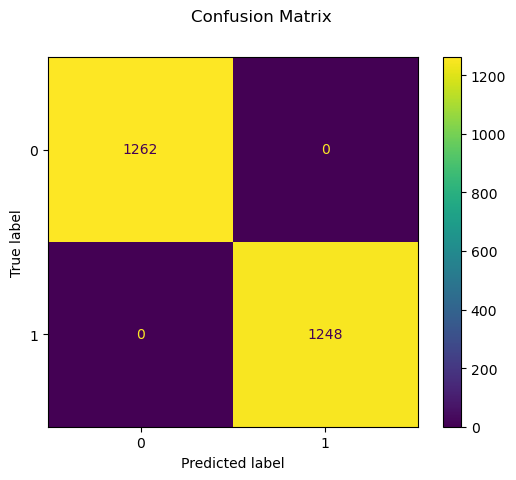

In [1]:
from models.trainModel import run as generate_new_model
from models.CNN.CNNmodel import CNN
different_traning_sizes = [100000]
for i in different_traning_sizes:
    name = f"Trails_class_nA{i}"
    print(name)
    generate_new_model(constructor=CNN,
                           name=name, save=True, verbose=True,data_size_cap=i)

In [1]:
import tensorflow

2022-10-31 12:06:02.063288: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
from models.trainModel import load_model
ai_trails_testing = [load_model(f"Trails_class_nA100000")]


In [4]:
import run

from TA.subset.try_all import TryAll
from TA.subset.random_w_hash import RandomWHashSelect
from TA.subset.random_select import RandomSelect
from TA.delta.squaredSum import SumOfExamples as delta
import time

from utils.global_props import set_e, set_B, set_mu
sampling_attempts = [1000000000] #"infinite"
deltas = [delta()]
sub_set_selectors = [TryAll()]

#different_e_values = range(25,0,-1)
#different_B_values = list(range(0,9))
different_mu_values = [0.1,1,10,11,12,13,14,15,16,17,18,19,20,50,100,150,200,300,400,500]
#different_mu_values = [40,50,60,70,80,85,90,95,100,105,110,115,120,130,140,150,200,500]



"""
for B in different_B_values:
set_B(B)
for e in different_e_values:
set_e(e)
"""
for mu in different_mu_values:
    print("attempting mu:",mu)
    set_mu(mu)
    run.main_run_system(re_train=False,clean_data=False, deltas=deltas, ai_models=ai_trails_testing,
                         differentNrAttempts=sampling_attempts,subset_selectors=sub_set_selectors, verbose=True)

attempting mu: 0.1
model: Trails_class_nA100000
subset_selector: TryAll
compatibility_evalutator: Mean_Square_Error
delta: SquaredSum
attemps: 1000000000
Start load..
end load
early return at 1 16
model: Trails_class_nA100000
subset_selector: TryAll
compatibility_evalutator: Mean_Square_Error
delta: SquaredSum
attemps: 1000000000
Start load..
end load
impossible to find better score. Early break after 2 attempts. sample size: 15
Failed to get theoretical best on run 15
model: Trails_class_nA100000
subset_selector: TryAll
compatibility_evalutator: Mean_Square_Error
delta: SquaredSum
attemps: 1000000000
Start load..
end load
impossible to find better score. Early break after 5 attempts. sample size: 14
Failed to get theoretical best on run 14
model: Trails_class_nA100000
subset_selector: TryAll
compatibility_evalutator: Mean_Square_Error
delta: SquaredSum
attemps: 1000000000
Start load..
end load
impossible to find better score. Early break after 7 attempts. sample size: 13
Failed to get

end load
impossible to find better score. Early break after 5 attempts. sample size: 2
Failed to get theoretical best on run 2
model: Trails_class_nA100000
subset_selector: TryAll
compatibility_evalutator: Mean_Square_Error
delta: SquaredSum
attemps: 1000000000
Start load..
end load
impossible to find better score. Early break after 6 attempts. sample size: 1
Failed to get theoretical best on run 1
attempting mu: 10
model: Trails_class_nA100000
subset_selector: TryAll
compatibility_evalutator: Mean_Square_Error
delta: SquaredSum
attemps: 1000000000
Start load..
end load
early return at 1 16
model: Trails_class_nA100000
subset_selector: TryAll
compatibility_evalutator: Mean_Square_Error
delta: SquaredSum
attemps: 1000000000
Start load..
end load
impossible to find better score. Early break after 2 attempts. sample size: 15
Failed to get theoretical best on run 15
model: Trails_class_nA100000
subset_selector: TryAll
compatibility_evalutator: Mean_Square_Error
delta: SquaredSum
attemps: 1

Start load..
end load
impossible to find better score. Early break after 6 attempts. sample size: 1
Failed to get theoretical best on run 1
attempting mu: 12
model: Trails_class_nA100000
subset_selector: TryAll
compatibility_evalutator: Mean_Square_Error
delta: SquaredSum
attemps: 1000000000
Start load..
end load
early return at 1 16
model: Trails_class_nA100000
subset_selector: TryAll
compatibility_evalutator: Mean_Square_Error
delta: SquaredSum
attemps: 1000000000
Start load..
end load
impossible to find better score. Early break after 2 attempts. sample size: 15
Failed to get theoretical best on run 15
model: Trails_class_nA100000
subset_selector: TryAll
compatibility_evalutator: Mean_Square_Error
delta: SquaredSum
attemps: 1000000000
Start load..
end load
impossible to find better score. Early break after 5 attempts. sample size: 14
Failed to get theoretical best on run 14
model: Trails_class_nA100000
subset_selector: TryAll
compatibility_evalutator: Mean_Square_Error
delta: Square

Start load..
end load
impossible to find better score. Early break after 6 attempts. sample size: 1
Failed to get theoretical best on run 1
attempting mu: 14
model: Trails_class_nA100000
subset_selector: TryAll
compatibility_evalutator: Mean_Square_Error
delta: SquaredSum
attemps: 1000000000
Start load..
end load
early return at 1 16
model: Trails_class_nA100000
subset_selector: TryAll
compatibility_evalutator: Mean_Square_Error
delta: SquaredSum
attemps: 1000000000
Start load..
end load
impossible to find better score. Early break after 2 attempts. sample size: 15
Failed to get theoretical best on run 15
model: Trails_class_nA100000
subset_selector: TryAll
compatibility_evalutator: Mean_Square_Error
delta: SquaredSum
attemps: 1000000000
Start load..
end load
impossible to find better score. Early break after 5 attempts. sample size: 14
Failed to get theoretical best on run 14
model: Trails_class_nA100000
subset_selector: TryAll
compatibility_evalutator: Mean_Square_Error
delta: Square

Start load..
end load
impossible to find better score. Early break after 6 attempts. sample size: 1
Failed to get theoretical best on run 1
attempting mu: 16
model: Trails_class_nA100000
subset_selector: TryAll
compatibility_evalutator: Mean_Square_Error
delta: SquaredSum
attemps: 1000000000
Start load..
end load
early return at 1 16
model: Trails_class_nA100000
subset_selector: TryAll
compatibility_evalutator: Mean_Square_Error
delta: SquaredSum
attemps: 1000000000
Start load..
end load
impossible to find better score. Early break after 2 attempts. sample size: 15
Failed to get theoretical best on run 15
model: Trails_class_nA100000
subset_selector: TryAll
compatibility_evalutator: Mean_Square_Error
delta: SquaredSum
attemps: 1000000000
Start load..
end load
impossible to find better score. Early break after 5 attempts. sample size: 14
Failed to get theoretical best on run 14
model: Trails_class_nA100000
subset_selector: TryAll
compatibility_evalutator: Mean_Square_Error
delta: Square

Start load..
end load
impossible to find better score. Early break after 6 attempts. sample size: 1
Failed to get theoretical best on run 1
attempting mu: 18
model: Trails_class_nA100000
subset_selector: TryAll
compatibility_evalutator: Mean_Square_Error
delta: SquaredSum
attemps: 1000000000
Start load..
end load
early return at 1 16
model: Trails_class_nA100000
subset_selector: TryAll
compatibility_evalutator: Mean_Square_Error
delta: SquaredSum
attemps: 1000000000
Start load..
end load
impossible to find better score. Early break after 2 attempts. sample size: 15
Failed to get theoretical best on run 15
model: Trails_class_nA100000
subset_selector: TryAll
compatibility_evalutator: Mean_Square_Error
delta: SquaredSum
attemps: 1000000000
Start load..
end load
impossible to find better score. Early break after 5 attempts. sample size: 14
Failed to get theoretical best on run 14
model: Trails_class_nA100000
subset_selector: TryAll
compatibility_evalutator: Mean_Square_Error
delta: Square

Start load..
end load
impossible to find better score. Early break after 6 attempts. sample size: 1
Failed to get theoretical best on run 1
attempting mu: 20
model: Trails_class_nA100000
subset_selector: TryAll
compatibility_evalutator: Mean_Square_Error
delta: SquaredSum
attemps: 1000000000
Start load..
end load
early return at 1 16
model: Trails_class_nA100000
subset_selector: TryAll
compatibility_evalutator: Mean_Square_Error
delta: SquaredSum
attemps: 1000000000
Start load..
end load
impossible to find better score. Early break after 2 attempts. sample size: 15
Failed to get theoretical best on run 15
model: Trails_class_nA100000
subset_selector: TryAll
compatibility_evalutator: Mean_Square_Error
delta: SquaredSum
attemps: 1000000000
Start load..
end load
impossible to find better score. Early break after 5 attempts. sample size: 14
Failed to get theoretical best on run 14
model: Trails_class_nA100000
subset_selector: TryAll
compatibility_evalutator: Mean_Square_Error
delta: Square

Start load..
end load
impossible to find better score. Early break after 6 attempts. sample size: 1
Failed to get theoretical best on run 1
attempting mu: 100
model: Trails_class_nA100000
subset_selector: TryAll
compatibility_evalutator: Mean_Square_Error
delta: SquaredSum
attemps: 1000000000
Start load..
end load
early return at 1 16
model: Trails_class_nA100000
subset_selector: TryAll
compatibility_evalutator: Mean_Square_Error
delta: SquaredSum
attemps: 1000000000
Start load..
end load
impossible to find better score. Early break after 2 attempts. sample size: 15
Failed to get theoretical best on run 15
model: Trails_class_nA100000
subset_selector: TryAll
compatibility_evalutator: Mean_Square_Error
delta: SquaredSum
attemps: 1000000000
Start load..
end load
impossible to find better score. Early break after 5 attempts. sample size: 14
Failed to get theoretical best on run 14
model: Trails_class_nA100000
subset_selector: TryAll
compatibility_evalutator: Mean_Square_Error
delta: Squar

Start load..
end load
impossible to find better score. Early break after 6 attempts. sample size: 1
Failed to get theoretical best on run 1
attempting mu: 200
model: Trails_class_nA100000
subset_selector: TryAll
compatibility_evalutator: Mean_Square_Error
delta: SquaredSum
attemps: 1000000000
Start load..
end load
early return at 1 16
model: Trails_class_nA100000
subset_selector: TryAll
compatibility_evalutator: Mean_Square_Error
delta: SquaredSum
attemps: 1000000000
Start load..
end load
impossible to find better score. Early break after 2 attempts. sample size: 15
Failed to get theoretical best on run 15
model: Trails_class_nA100000
subset_selector: TryAll
compatibility_evalutator: Mean_Square_Error
delta: SquaredSum
attemps: 1000000000
Start load..
end load
impossible to find better score. Early break after 5 attempts. sample size: 14
Failed to get theoretical best on run 14
model: Trails_class_nA100000
subset_selector: TryAll
compatibility_evalutator: Mean_Square_Error
delta: Squar

Start load..
end load
impossible to find better score. Early break after 6 attempts. sample size: 1
Failed to get theoretical best on run 1
attempting mu: 400
model: Trails_class_nA100000
subset_selector: TryAll
compatibility_evalutator: Mean_Square_Error
delta: SquaredSum
attemps: 1000000000
Start load..
end load
early return at 1 16
model: Trails_class_nA100000
subset_selector: TryAll
compatibility_evalutator: Mean_Square_Error
delta: SquaredSum
attemps: 1000000000
Start load..
end load
impossible to find better score. Early break after 2 attempts. sample size: 15
Failed to get theoretical best on run 15
model: Trails_class_nA100000
subset_selector: TryAll
compatibility_evalutator: Mean_Square_Error
delta: SquaredSum
attemps: 1000000000
Start load..
end load
impossible to find better score. Early break after 5 attempts. sample size: 14
Failed to get theoretical best on run 14
model: Trails_class_nA100000
subset_selector: TryAll
compatibility_evalutator: Mean_Square_Error
delta: Squar

In [9]:
ai_models =  ai_trails_testing

In [10]:
from utils.dataset import load_dataset
from utils.common import remove_digit_from_labels
from TA.Lambda.mean_square_error import MSE
from models.trainModel import load_model
import random
def sub_sample_test(valid_X, valid_labels, sample_size):
    all_data_zip = []
    for i in range(len(valid_labels)):
        all_data_zip.append((valid_X[i], valid_labels[i]))

    picks = random.sample(all_data_zip, sample_size)

    valid_X, valid_labels = zip(*picks)
    return valid_X, valid_labels

def prop_map_display(model):
    print("loading...")
    X, y, labels = load_dataset()
    print("loading done!")
    labels = remove_digit_from_labels(labels)
    mse = MSE()
    prop_map = mse._get_probaility_map_ai(ai_model=model, valid_X=X, valid_labels=labels)
    for elem in prop_map.keys():
        print(str(prop_map[elem]*100).replace(".",","))

In [11]:
for model in ai_models:
    print("#"*10,str(model),"#"*10)
    prop_map_display(model) 

########## Trails_class_AB800 ##########
loading...
loading done!
0,0
3,943217665615142
0,16233766233766234
0,0
0,0
71,51702786377709
19,2
22,56568778979907
11,708860759493671
11,075949367088606
0,0
95,05582137161085
96,06164383561644
64,04833836858006
48,88123924268503
100,0


In [ ]:
# this is going for all data. Should give same lambda then
for model in ai_models:
    print("#"*10,str(model),"#"*10)
    prop_map_display(model) 

########## CNN_paper_work_AB_CD_10 ##########


In [23]:
i = [1250]
names = list(map(lambda x: f"CNN_aligment_test_{x}", i))
for name in names:
    print("#"*10,name,"#"*10)
    prop_map_display(name) 

########## CNN_aligment_test_1250 ##########
0,0
0,641025641025641
1,2464046021093003
21,547502448579824
30,125523012552303
50,10615711252654
46,09450337512054
89,60155490767735


In [5]:
from utils.dataset import load_dataset
X, y, labels = load_dataset()
from utils.common import remove_digit_from_labels
labels = remove_digit_from_labels(labels)

In [6]:
mse = MSE()
prop_map = mse._get_probaility_map_ai(ai_model=model, valid_X=X, valid_labels=labels)

In [7]:
for elem in prop_map.keys():
    print("'"+str(elem) + "'" +  ":" + str(prop_map[elem]))

'':0.0
'A':0.0
'B':0.0
'C':0.0
'D':0.0
'AB':0.8035714285714286
'AC':0.10294117647058823
'AD':0.21666666666666667
'BC':0.07575757575757576
'BD':0.09615384615384616
'CD':0.7435897435897436
'ABC':0.9880952380952381
'ABD':0.9016393442622951
'ACD':0.9841269841269841
'BCD':0.9827586206896551
'ABCD':0.9850746268656716


In [21]:
from models.trainModel import load_model

model_10 = load_model("CNN_aligment_test_10")

OSError: No file or directory found at models/savedModels/CNN_aligment_test_10

In [33]:
prop_map_500 = mse._get_probaility_map_ai(ai_model=model_500, valid_X=X, valid_labels=labels)

In [34]:
for elem in prop_map_500.keys():
    print("'"+str(elem) + "'" +  ":" + str(prop_map[elem]))

'':0.0
'A':1.0
'B':1.0
'C':0.9932735426008968
'AB':0.4655408489274304
'AC':0.10053619302949061
'BC':0.054528650646950096
'ABC':0.0013599274705349048


In [35]:
model_200 = load_model("train_set_200")

In [36]:
prop_map_200 = mse._get_probaility_map_ai(ai_model=model_200, valid_X=X, valid_labels=labels)

In [38]:
def show(prop_map):
    for elem in prop_map.keys():
        print("'"+str(elem) + "'" +  ":" + str(prop_map[elem]))

In [39]:
show(prop_map_200)

'':0.0
'A':0.9948074426655128
'B':1.0
'C':0.8147982062780269
'AB':0.6394340483797353
'AC':0.4316353887399464
'BC':0.3077634011090573
'ABC':0.05031731640979148


In [43]:
show(prop_map_500)

'':0.0
'A':1.0
'B':1.0
'C':0.9690582959641255
'AB':0.6768598813327248
'AC':0.3315460232350313
'BC':0.20517560073937152
'ABC':0.010879419764279238


In [42]:
show(prop_map_600)

'':0.0
'A':1.0
'B':1.0
'C':0.9932735426008968
'AB':0.4655408489274304
'AC':0.10053619302949061
'BC':0.054528650646950096
'ABC':0.0013599274705349048


In [41]:
prop_map_600 = mse._get_probaility_map_ai(ai_model=model_600, valid_X=X, valid_labels=labels)

In [44]:
def theoretical_closest(prop_map):
    mse = 0
    for k in prop_map:
        mse += prop_map[k]**2
    return mse

In [46]:
for prop_map in [prop_map_200,prop_map_500,prop_map_600]:
    print(theoretical_closest(prop_map))

3.345973119369467
3.549351434370778
3.2164033617039736


In [47]:
def theoretical_closest_v2(prop_map):
    mse = 0
    for k in prop_map:
        mse += prop_map[k]
    return mse

4.2387558035820705
4.193519221035532
3.615239162675303
